In [1]:
import importlib.machinery
import numpy as np

pyfor = importlib.machinery.SourceFileLoader('pyfor','/home/bryce/Programming/PyFor/pyfor/__init__.py').load_module()

http://users.cis.fiu.edu/~chens/PDF/TGRS.pdf

In [48]:
# Load a sample point cloud and retrieve a 0.5 resolution grid

a = pyfor.cloud.Cloud("/home/bryce/Desktop/pyfor_test_data/PC_001.las")
a_grid = a.grid(0.5)
#A = a_grid.array("min", "z")
A = a_grid.interpolate("min", "z")
A = A[1:600, 1:600]

Determine series of $w_k$ using (4) or (5) where $w_k$ <= maximum window size

(4): $w_k = 2kb + 1$

(5): $w_k = 2b^k + 1$

I'll elect to try (4) first, authors suggest it is computationally easier later on.

In [56]:
test_z = A[1,:]
max_window_size = 4

def w_k(k, b = 2):
    return(2 * k * b + 1)
  
def dht(elev_array, w_k, w_k_1):
    s = slope(elev_array, w_k, w_k_1)
    if w_k <= 3:
        return(dh0)
    elif w_k > 3:
        return(s*(w_k - w_k_1)*c + dh0)
    else:
        return(dhmax)

def dhmax(elev_array):
    return(np.max(elev_array) - np.min(elev_array))

    
def slope(elev_array, w_k, w_k_1):
    s = dhmax(elev_array) / ((w_k - w_k_1) / 2)
    return(s)

    
w_k_list = list(map(w_k, range(1, max_window_size+1)))

w_k_list

[5, 9, 13, 17]

In [50]:
# Set parameters
c = a_grid.cell_size
b = 2
d_hmax = 3
m = A.shape[0]
n= A.shape[1]
dh0 = 1
flag = np.zeros((m, n))

In [55]:
test_z = A[1,:]

def erosion(Z, w_k):
    Z_f = []
    for j in range(1, n+1):
        # Construct vector of l indices
        lb = np.floor(j - (w_k / 2))
        ub = np.ceil(j + (w_k / 2))
        
        a = [Z[l] for l in range(int(lb), int(ub)) if l >=0 and l <= len(Z)-1]
        Z_f.append(np.min(a))
    return(Z_f)
    
def dilation(Z, w_k):
    Z_f = []
    for j in range(1, n+1):
        # Construct vector of l indices
        lb = np.floor(j - (w_k / 2))
        ub = np.ceil(j + (w_k / 2))
        
        a = [Z[l] for l in range(int(lb), int(ub)) if l >=0 and l <= len(Z)-1]
        Z_f.append(np.max(a))
    return(Z_f)

test_zf = erosion(test_z, 5)
test_zf = dilation(test_zf, 5)
test_z - test_zf

#w_k_list

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -2.51200000e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.62000000e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.71300000e+01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [57]:
w_k_min = min(w_k_list)

for w_k in enumerate(w_k_list):
    if w_k[1] == w_k_min:
        w_k_1 = 0
    else:
        w_k_1 = w_k_list[w_k[0] - 1]
    for i in range(0, m):
        P_i = A[i,:]
        Z = P_i
        Z_f = erosion(Z, w_k[1])
        Z_f = dilation(Z_f, w_k[1])
        P_i = Z_f
        A[i,:] = P_i
        dh_t = dht(Z, w_k[1], w_k_1)
        for j in range(0, n):
            if Z[j] - Z_f[j] > dh_t:
                flag[i,j] = w_k[1]
    # there is an extra bit in zhang but I think my function does
    # it already

np.sum(flag)

0.0

In [80]:
test = [1,2,3]

for i in enumerate(test):
    print(i[0], i[1])

0 1
1 2
2 3


In [73]:
dht(test_z, w_k_list[1], w_k_list[0])

48.899999999999977

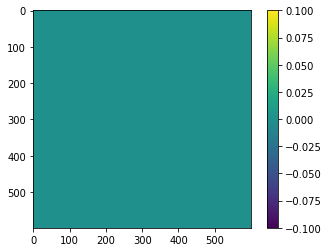

0.0

In [54]:
import matplotlib.pyplot as plt

A1 = a_grid.interpolate(min, "z")

plt.imshow(flag);
plt.colorbar()
plt.show()

In [12]:
a_grid.interpolate("min", "z")

array([[ 629.93,  629.93,  637.79, ...,  610.58,  610.66,  610.66],
       [ 629.93,  629.93,  629.93, ...,  610.58,  610.66,  610.66],
       [ 610.93,  629.93,  629.93, ...,  610.58,  610.66,  610.66],
       ..., 
       [ 591.51,  591.51,  591.51, ...,  704.13,  685.13,  685.13],
       [ 591.35,  591.35,  591.35, ...,  706.73,  705.24,  705.24],
       [ 591.35,  591.35,  591.35, ...,  706.73,  705.24,  705.24]])